In [119]:
import time
tim = time.time()
# in delays03312017.csv, only flights delayed > 14 are counted
import pandas as pd
import numpy as np
flights = pd.read_csv('delays03312017.csv')
flights = pd.DataFrame(flights)
print "Time to run code is ", time.time() - tim

Time to run code is  2.12389206886


In [75]:
flights2 = flights.copy()

In [231]:
flights2.head()

,Unnamed: 0,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,WW
0,27,NK,597,N528NK,MSP,FLL,25.0,25.0,0.0,0.0,0.0,0.0,1
1,30,NK,168,N629NK,PHX,ORD,43.0,43.0,0.0,0.0,0.0,0.0,1
2,34,HA,17,N389HA,LAS,HNL,15.0,0.0,0.0,15.0,0.0,0.0,1
3,48,B6,1030,N239JB,BQN,MCO,20.0,20.0,0.0,0.0,0.0,0.0,1
4,50,B6,2134,N307JB,SJU,MCO,85.0,0.0,0.0,85.0,0.0,0.0,1


In [97]:
flights2.head()
flights2.reset_index()

,index,Unnamed: 0,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,WW
0,0,27,NK,597,N528NK,MSP,FLL,25.0,25.0,0.0,0.0,0.0,0.0,1
1,1,30,NK,168,N629NK,PHX,ORD,43.0,43.0,0.0,0.0,0.0,0.0,1
2,2,34,HA,17,N389HA,LAS,HNL,15.0,0.0,0.0,15.0,0.0,0.0,1
3,3,48,B6,1030,N239JB,BQN,MCO,20.0,20.0,0.0,0.0,0.0,0.0,1
4,4,50,B6,2134,N307JB,SJU,MCO,85.0,0.0,0.0,85.0,0.0,0.0,1
5,5,53,B6,2276,N646JB,SJU,BDL,89.0,17.0,0.0,72.0,0.0,0.0,1
6,6,67,AA,1057,N3ASAA,DFW,MIA,102.0,0.0,0.0,0.0,0.0,102.0,1
7,7,70,US,425,N174US,PDX,PHX,60.0,0.0,0.0,60.0,0.0,0.0,1
8,8,71,AA,89,N3KVAA,IAH,MIA,54.0,0.0,0.0,54.0,0.0,0.0,1
9,9,82,AA,328,N4XKAA,DEN,DFW,66.0,13.0,0.0,53.0,0.0,0.0,1


In [98]:
# 1 out of 6 flights delayed > 15 minutes
flights2.shape

(1063439, 13)

In [99]:
list_of_airlines = flights2['AIRLINE'].unique().tolist()
WorkWeek = np.arange(1,54)

In [125]:
delay_types = []
delays = ['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']


In [126]:
delay_types = []
def delay_reason(Week):
    for plane in list_of_airlines:
        flights2 = flights.copy()
        flights2 = flights2[flights2['WW']== Week]
        flights2 = flights2[flights2['AIRLINE'] == plane]
        for reason in delays:
            flights2 = flights2[flights2['WW']== Week]
            flights2 = flights2[flights2['AIRLINE'] == plane]
            delay = 0
            delay = len(flights2[flights2[reason] > 10])
            delay = float(delay)
            total_flights = 0
            total_flights = len(flights2['AIRLINE'])
            total_flights = float(total_flights)
            if total_flights > 0:
                percent = 0.0
                percent = (delay/total_flights)*100
                delay_types.append(percent)
            else:
                delay_types.append(0)
            flights2 = flights.copy()
            


In [127]:
tim = time.time()
for num in WorkWeek:
    delay_reason(num)
print "Time to run code is ", time.time() - tim, "seconds"

Time to run code is  354.935783148 seconds


In [128]:
len(delay_types)

3710

In [129]:
import pandas as pd
delay_agg = pd.DataFrame(delay_types)

In [131]:
delay_agg['WW'] = 0

In [133]:
delay_agg.index = delay_agg.index + 1

In [143]:
delay_agg.tail()

,0,WW
3706,24.223602,53
3707,1.863354,53
3708,34.782609,53
3709,52.795031,53
3710,3.105590,53


In [141]:
weeks = 1
for i,row in delay_agg.iterrows():
    if i % 70 != 0:
        delay_agg.set_value(i,'WW',weeks)
    else:
        delay_agg.set_value(i,'WW',weeks)
        weeks = weeks + 1

In [144]:
delay_agg['AIRLINE'] = ""
delay_agg.head()

,0,WW,AIRLINE
1,100.0,1,
2,0.0,1,
3,0.0,1,
4,0.0,1,
5,0.0,1,


In [175]:
car = 0
for j,row in delay_agg.iterrows():
    if j % 5 != 0:
        delay_agg.set_value(j,'AIRLINE',list_of_airlines[car])
    else:
        delay_agg.set_value(j,'AIRLINE',list_of_airlines[car])
        car = car + 1
        if car > 13:
            car = 0
        else: continue

In [200]:
delay_agg['Delay_Type'] = ""
delay_agg.head()

AIRLINE               AA                                                      \
Delay_Type AIRLINE_DELAY AIR_SYSTEM_DELAY LATE_AIRCRAFT_DELAY SECURITY_DELAY   
WW                                                                             
1              38.361560        35.092556           55.651831       0.551398   
2              39.283366        31.097962           45.759369       0.032873   
3              41.886792        32.452830           37.735849       0.251572   
4              38.049853        41.422287           30.131965       0.073314   
5              38.950042        40.982218           28.704488       0.084674   

AIRLINE                             AS                                       \
Delay_Type WEATHER_DELAY AIRLINE_DELAY AIR_SYSTEM_DELAY LATE_AIRCRAFT_DELAY   
WW                                                                            
1               3.899173     32.994924        41.116751           35.532995   
2               7.988166     28.378378        41.666667           37.162162   
3               2.138365     27.835052        44.845361           34.278351   
4               2.859238     26.086957        44.147157           31.103679   
5               6.858594     25.879917        36.645963           43.271222   

AIRLINE                                    ...                   VX  \
Delay_Type SECURITY_DELAY WEATHER_DELAY    ...     AIR_SYSTEM_DELAY   
WW                                         ...                        
1                0.253807      4.822335    ...            20.792079   
2                0.225225      9.009009    ...            36.040609   
3                0.257732      2.061856    ...            44.843049   
4                0.334448      3.344482    ...            22.388060   
5                0.000000      6.625259    ...            34.285714   

AIRLINE                                                                WN  \
Delay_Type LATE_AIRCRAFT_DELAY SECURITY_DELAY WEATHER_DELAY AIRLINE_DELAY   
WW                                                                          
1                    28.712871       1.980198     24.752475     42.961849   
2                    29.949239       1.015228     19.289340     40.261482   
3                    34.977578       0.000000     12.107623     35.852197   
4                    29.850746       0.000000     28.358209     31.330645   
5                    23.809524       0.952381     19.047619     29.045488   

AIRLINE                                                                       \
Delay_Type AIR_SYSTEM_DELAY LATE_AIRCRAFT_DELAY SECURITY_DELAY WEATHER_DELAY   
WW                                                                             
1                 20.409697           65.307273       0.150348      2.180041   
2                 20.868253           57.961783       0.201140      3.151190   
3                 18.342210           53.195739       0.000000      1.897470   
4                 24.758065           48.387097       0.080645      2.379032   
5                 26.696495           50.633855       0.223714      4.436987   

AIRLINE    Delay_Type  
Delay_Type             
WW                     
1                      
2                      
3                      
4                      
5                      

[5 rows x 71 columns]

In [183]:
var2 = 0
for j,row in delay_agg.iterrows():
    delay_agg.set_value(j,'Delay_Type',delays[var2])
    var2 = var2 + 1
    if var2 > 4:
        var2 = 0
    else: continue


In [189]:
delay_agg.head()

,0,WW,AIRLINE,Delay_Type
1,100.0,1,NK,AIR_SYSTEM_DELAY
2,0.0,1,NK,SECURITY_DELAY
3,0.0,1,NK,AIRLINE_DELAY
4,0.0,1,NK,LATE_AIRCRAFT_DELAY
5,0.0,1,NK,WEATHER_DELAY


In [203]:
delay_agg = delay_agg.pivot_table(index=['WW', 'AIRLINE'], columns='Delay_Type', values=0)


KeyError: 'WW'

In [204]:
delay_agg.head(20)

AIRLINE               AA                                                      \
Delay_Type AIRLINE_DELAY AIR_SYSTEM_DELAY LATE_AIRCRAFT_DELAY SECURITY_DELAY   
WW                                                                             
1              38.361560        35.092556           55.651831       0.551398   
2              39.283366        31.097962           45.759369       0.032873   
3              41.886792        32.452830           37.735849       0.251572   
4              38.049853        41.422287           30.131965       0.073314   
5              38.950042        40.982218           28.704488       0.084674   
6              33.835458        43.568946           32.387022       0.115875   
7              39.280470        39.794420           30.323054       0.073421   
8              35.614647        43.461203           35.919791       0.261552   
9              36.603774        45.728988           36.500858       0.137221   
10             42.288557        34.186212           39.445629       0.142146   
11             39.148352        36.721612           41.071429       0.045788   
12             41.420118        34.749866           37.816030       0.322754   
13             36.701860        35.495224           41.729512       0.100553   
14             38.029782        37.800687           33.562428       0.057274   
15             38.581489        38.933602           36.217304       0.100604   
16             31.736243        35.910816           40.891841       0.332068   
17             33.137432        45.524412           38.562387       0.090416   
18             44.399460        32.118758           39.608637       0.067476   
19             29.598588        39.303044           41.023379       0.132333   
20             38.827434        33.185841           38.384956       0.165929   

AIRLINE                             AS                                       \
Delay_Type WEATHER_DELAY AIRLINE_DELAY AIR_SYSTEM_DELAY LATE_AIRCRAFT_DELAY   
WW                                                                            
1               3.899173     32.994924        41.116751           35.532995   
2               7.988166     28.378378        41.666667           37.162162   
3               2.138365     27.835052        44.845361           34.278351   
4               2.859238     26.086957        44.147157           31.103679   
5               6.858594     25.879917        36.645963           43.271222   
6               7.300116     22.200000        48.800000           38.600000   
7               6.020558     30.000000        37.435897           37.692308   
8               7.367044     29.442971        33.421751           38.461538   
9              15.300172     27.431421        42.394015           35.660848   
10              4.015636     29.600000        43.466667           32.000000   
11              0.412088     25.663717        43.510324           38.348083   
12              1.237224     34.520548        40.000000           33.150685   
13              5.228758     36.811594        33.043478           35.652174   
14              6.471936     39.107612        30.446194           34.383202   
15              6.237425     33.707865        41.198502           30.337079   
16             16.129032     28.695652        44.927536           34.782609   
17              9.764919     28.650138        40.495868           37.190083   
18              3.238866     36.482085        30.618893           34.853420   
19             18.129687     24.164524        52.442159           27.763496   
20              5.475664     29.894180        46.560847           29.629630   

AIRLINE                                    ...                   VX  \
Delay_Type SECURITY_DELAY WEATHER_DELAY    ...     AIR_SYSTEM_DELAY   
WW                                         ...                        
1                0.253807      4.822335    ...            20.792079   
2                0.225225      9.009009    ...           

In [198]:
delay_agg.columns

MultiIndex(levels=[[u'AA', u'AS', u'B6', u'DL', u'EV', u'F9', u'HA', u'MQ', u'NK', u'OO', u'UA', u'US', u'VX', u'WN'], [u'AIRLINE_DELAY', u'AIR_SYSTEM_DELAY', u'LATE_AIRCRAFT_DELAY', u'SECURITY_DELAY', u'WEATHER_DELAY']],
           labels=[[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13], [0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4]],
           names=[u'AIRLINE', u'Delay_Type'])

In [225]:
list_of_airlines

['NK',
 'HA',
 'B6',
 'AA',
 'US',
 'UA',
 'DL',
 'OO',
 'F9',
 'EV',
 'WN',
 'MQ',
 'AS',
 'VX']

<IPython.core.display.Javascript object>


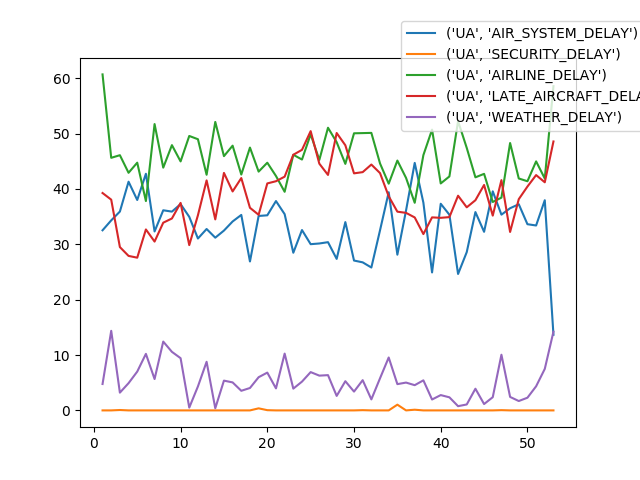

In [230]:
fig = plt.figure()

for word in delays:
    plt.plot(delay_agg['UA', word])
plt.legend(loc='right', bbox_to_anchor=(1.2, 0.95))
